<a href="https://colab.research.google.com/github/braydengerrard/NBACoaches/blob/main/CoachingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.set_option('display.max_columns', None)

#Bring in the dataset
coach = pd.read_csv('/content/drive/MyDrive/Python_Files/Coaches.csv', on_bad_lines = 'skip').iloc[:,0:6]
coach['Internal'] = coach['Internal?'].map(dict(Yes=1, No=0))
coach

Mounted at /content/drive


,Team,Year,Coach,Internal?,Type,Years,Internal
0,WAS,2021,Wes Unsled Jr,No,Previous AC,2.5,0
1,POR,2021,Chauncey Billups,No,Previous AC,4.0,0
2,ORL,2021,Jamahl Mosley,No,Previous AC,4.0,0
3,NOP,2021,Willie Green,No,Previous AC,4.0,0
4,IND,2021,Rick Carlisle,No,Previous HC,4.0,0
...,...,...,...,...,...,...,...
216,DEN,1990,Paul Westhead,No,Previous HC,2.0,0
217,LAC,1990,Mike Schuler,No,Previous HC,1.5,0
218,LAL,1990,Mike Dunleavy Sr,No,Previous AC,2.0,0
219,NYK,1990,John MacLeod,No,Previous HC,1.0,0


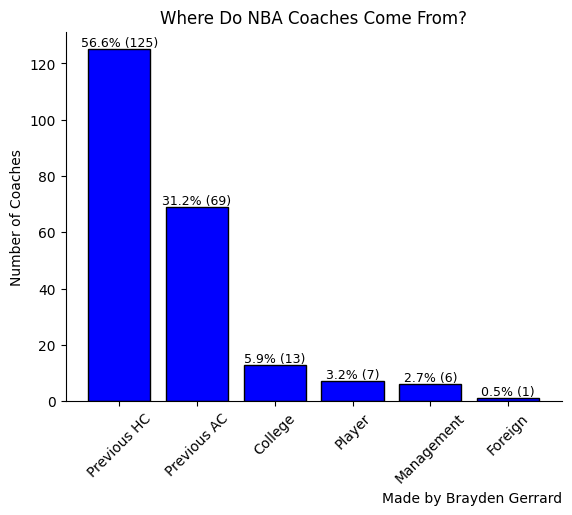

In [3]:
#Create some charts
import matplotlib.pyplot as plt

counts = coach['Type'].value_counts()

plt.bar(counts.index, counts.values, color = 'blue', edgecolor = 'black')
plt.title('Where Do NBA Coaches Come From?')
plt.figtext(0.76, -0.1, "Made by Brayden Gerrard", ha="center")
plt.xticks(rotation = 45)
plt.ylabel('Number of Coaches')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(counts.values):
    plt.text(i, value + 1, str(round((value/sum(counts.values))*100,1)) + '%' + ' (' + str(value) + ')', ha='center', fontsize=9)


plt.savefig('coachtype.png', bbox_inches = 'tight')

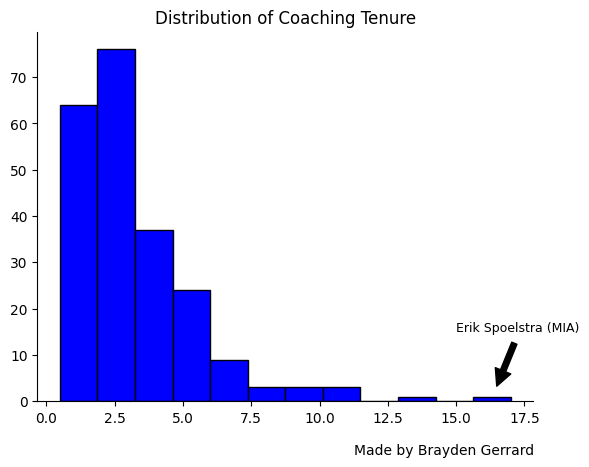

,Team,Year,Coach,Internal?,Type,Years,Internal
95,MIA,2008,Erik Spoelstra,Yes,Previous AC,17.0,1
97,DAL,2008,Rick Carlisle,No,Previous HC,13.0,0
154,LAL,1999,Phil Jackson,No,Previous HC,11.0,0
181,MIA,1995,Pat Riley,No,Previous HC,11.0,0
54,GSW,2014,Steve Kerr,No,Management,11.0,0
...,...,...,...,...,...,...,...
123,LAL,2004,Rudy Tomjanovich,No,Previous HC,0.5,0
99,PHO,2008,Terry Porter,No,Previous HC,0.5,0
182,NYK,1995,Don Nelson,No,Previous HC,0.5,0
209,SAS,1992,Jerry Tarkanian,No,College,0.5,0


<Figure size 640x480 with 0 Axes>

In [4]:
plt.hist(coach['Years'], bins =12, edgecolor = 'black', color = 'blue')
plt.title('Distribution of Coaching Tenure')
plt.figtext(0.76, 0, "Made by Brayden Gerrard", ha="center")
plt.annotate('Erik Spoelstra (MIA)', xy=(16.4, 2), xytext=(14 + 1, 15),
             arrowprops=dict(facecolor='black', shrink=0.1), fontsize=9, color='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

plt.savefig('tenurehist.png', bbox_inches = 'tight')

coach.sort_values('Years', ascending = False)

In total, the data contains 221 coaches. Their tenure ranged from less than one season to 17 seasons (Erik Spoelstra of the Miami Heat).

In [5]:
#Calculate some stats with the data
import numpy as np

print(str(np.median(coach['Years'])) + " years is the median coaching tenure length.")
print(str(round(((coach['Years'] <= 5).sum()/len(coach))*100,1)) + " percent of coaches last five years or less.")
print(str(round((coach['Years'] <= 1).sum()/len(coach)*100,1)) + " percent of coaches last a year or less.")

print(str(round(((coach['Internal'] == 1).sum()/len(coach))*100,1)) + " percent of coaches are internal.")

2.5 years is the median coaching tenure length.
89.6 percent of coaches last five years or less.
18.1 percent of coaches last a year or less.
13.6 percent of coaches are internal.


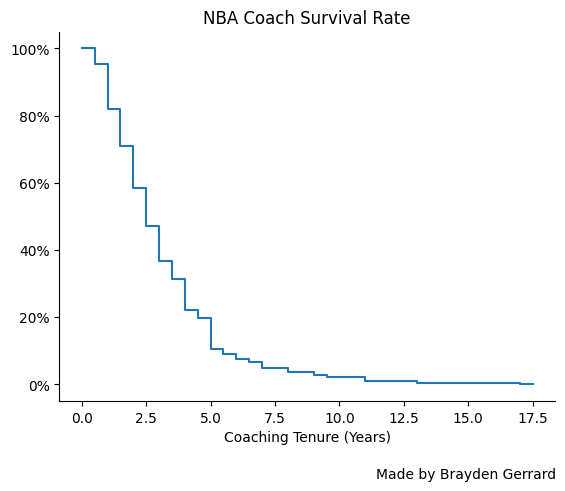

In [6]:
#Survival analysis
import matplotlib.ticker as mtick

lst = np.arange(0,18,0.5)

surv = pd.DataFrame(lst, columns = ['Period'])
surv['Number'] = np.nan

for i in range(0,len(surv)):
  surv.iloc[i,1] = (coach['Years'] >= surv.iloc[i,0]).sum()/len(coach)

plt.step(surv['Period'],surv['Number'])
plt.title('NBA Coach Survival Rate')
plt.xlabel('Coaching Tenure (Years)')
plt.figtext(0.76, -0.05, "Made by Brayden Gerrard", ha="center")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show
plt.savefig('coachsurvival.png', bbox_inches = 'tight')

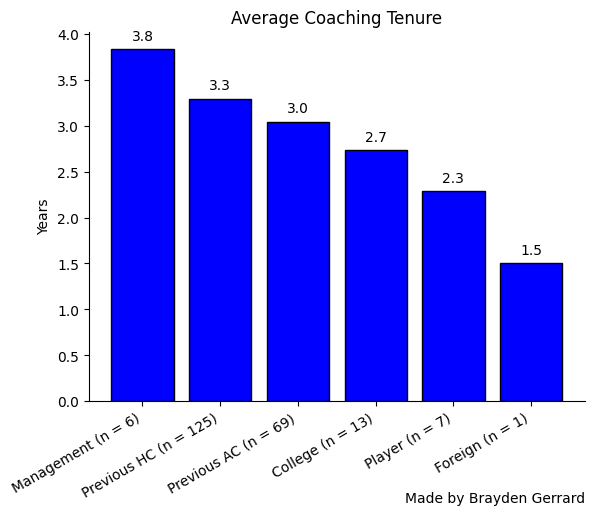

In [8]:
# Create chart with avg tenure by coach type
import scipy.stats as stats

coach_ten = coach['Type'].value_counts().reset_index()
coach_tenavg = coach.groupby('Type')['Years'].mean().reset_index()
coach_ten.columns = ['Type', 'Number of Occurrences']
coach_ten['Combined'] = coach_ten['Type'].astype(str) + ' (n = ' + coach_ten['Number of Occurrences'].astype(str) + ')'
coach_tenc = pd.merge(coach_tenavg, coach_ten, on = 'Type')

coach_tenc = coach_tenc.sort_values('Years', ascending = False)

plt.bar(coach_tenc['Combined'],coach_tenc['Years'], color = 'blue', edgecolor = 'black')
plt.title('Average Coaching Tenure')
plt.ylabel('Years')
plt.figtext(0.76, -0.1, "Made by Brayden Gerrard", ha="center")
for i, v in enumerate(coach_tenc['Years']):
    plt.text(i, v + 0.1, str(round(v,1)), ha='center', fontsize=10)
plt.xticks(rotation = 30, ha = 'right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show
plt.savefig('coachtypetenure.png', bbox_inches = 'tight')

In [9]:
#ANOVA
import statsmodels.api as sm

from statsmodels.formula.api import ols
am = ols('Years ~ C(Type) + C(Internal)', data=coach).fit()
anova_table = sm.stats.anova_lm(am, typ=2)

print(anova_table)

                  sum_sq     df         F    PR(>F)
C(Type)        16.726951    5.0  0.607629  0.694151
C(Internal)     0.278860    1.0  0.050650  0.822151
Residual     1178.208302  214.0       NaN       NaN


In [10]:
#Linear regression
coach_type_dummies = pd.get_dummies(coach['Type'], prefix = 'Type', drop_first = True).astype(int)
coach2 = pd.concat([coach, coach_type_dummies], axis = 1)

y = coach2['Years']
x = coach2[['Internal','Type_Foreign','Type_Management','Type_Player','Type_Previous AC','Type_Previous HC']]

x2 = sm.add_constant(x)
lm = sm.OLS(y,x2).fit()

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  Years   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.5070
Date:                Fri, 16 May 2025   Prob (F-statistic):              0.803
Time:                        14:16:00   Log-Likelihood:                -498.52
No. Observations:                 221   AIC:                             1011.
Df Residuals:                     214   BIC:                             1035.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.7308      0.651  

In [20]:
#Logistic regression
coach3 = coach[coach['Year']<2020]

coach3['Success'] = np.where(coach3['Years'] > 5, 1, 0)
print(coach3['Success'].value_counts())

coach_type_dummies = pd.get_dummies(coach3['Type'], prefix = 'Type', drop_first = True).astype(int)
coach3 = pd.concat([coach3, coach_type_dummies], axis = 1)

x = coach3[['Internal', 'Type_Foreign','Type_Management','Type_Player','Type_Previous AC', 'Type_Previous HC']]
x = sm.add_constant(x)
y = coach3['Success']

logm = sm.Logit(y,x)
logm.r = logm.fit()

print(logm.r.summary())

#Convert coefficients to odds ratio
print(str(np.exp(-1.4715)) + "is the odds ratio for internal.") #Internal coefficient
print(np.exp(1.6926)) #Management
print(np.exp(0.3275)) #Previous AC
print(np.exp(0.6901)) #Previous HC

Success
0    180
1     23
Name: count, dtype: int64
         Current function value: 0.339631
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:                  203
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            6
Date:                Fri, 16 May 2025   Pseudo R-squ.:                 0.03885
Time:                        14:25:14   Log-Likelihood:                -68.945
converged:                      False   LL-Null:                       -71.732
Covariance Type:            nonrobust   LLR p-value:                    0.4725
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.4849      1.041     -2.387      0.017      -4.525      -0

<ipython-input-20-c41fa74062e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coach3['Success'] = np.where(coach3['Years'] > 5, 1, 0)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
# Filter to non internal

internal = coach3[coach3['Internal'] == 1]
print(internal['Success'].value_counts())
print(internal)

Success
0    25
1     1
Name: count, dtype: int64
    Team  Year             Coach Internal?         Type  Years  Internal  \
23   MIN  2019     Ryan Saunders       Yes  Previous AC    2.5         1   
27   MEM  2018  J.B. Bickerstaff       Yes  Previous AC    2.0         1   
32   TOR  2018        Nick Nurse       Yes  Previous AC    5.0         1   
38   IND  2016     Nate McMillan       Yes  Previous HC    4.0         1   
65   MEM  2013      Dave Joerger       Yes  Previous AC    3.0         1   
82   ATL  2010        Larry Drew       Yes  Previous AC    3.0         1   
86   GSW  2010       Keith Smart       Yes  Previous AC    1.0         1   
93   CHI  2008   Vinny Del Negro       Yes   Management    2.0         1   
95   MIA  2008    Erik Spoelstra       Yes  Previous AC   17.0         1   
98   DET  2008     Michael Curry       Yes  Previous AC    1.0         1   
108  NYK  2006      Isiah Thomas       Yes   Management    2.0         1   
118  SEA  2005         Bob Weiss      